The objective of this analysis is to get some insights by comparing the spread of the virus with the trend of mobility

# Libraries import

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib
import re
import matplotlib.pyplot as plt
matplotlib.style.use(["ggplot"])

# Importation of the datasets

## Covid-19

The Covid19 dataset is provided by John Hopkins University. The dataset is updated every day

In [2]:
# url towards the Github repository
url_racine = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [3]:
# the date from which CSSE repository started to collect data
date_begin = datetime.date(2020,1,22)

# download of the data
date_end = datetime.date.today()

range_of_date = pd.date_range(date_begin,end=date_end).strftime("%m-%d-%Y").tolist()

In [4]:
range_of_date_iter = range_of_date
iterative = 0
records = pd.DataFrame()
except_dates = []
result = {}
while (len(except_dates)>1 and iterative < 5) or (iterative == 0):
    iterative += 1
    print(except_dates)
    except_dates = []
    for date_given in range_of_date_iter:
        try:
            temp = pd.read_csv(url_racine + date_given + ".csv")
            num = temp.shape[0]
            temp["date"] = np.repeat(date_given,num)
            temp["Date"] = [datetime.datetime.strptime(date_str,'%m-%d-%Y') for date_str in temp.date]
            #temp = temp.drop(columns=["date"])
            records = records.append(temp,sort=False)
        except:
            except_dates.append(date_given)
            pass
    range_of_date_iter = except_dates
    result["table"+str(iterative)]=records
    records = pd.DataFrame()
    
records = result["table1"]

[]


In [5]:
records[records.Country_Region=="US"].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,NaN,NaN,NaN,9654.0,63.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36061.0,New York City,New York,US,3/22/20 23:45,40.767273,-73.971526,0.0,"New York City, New York, US"
1,NaN,NaN,NaN,1900.0,4.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36059.0,Nassau,New York,US,3/22/20 23:45,40.740665,-73.589419,0.0,"Nassau, New York, US"
2,NaN,NaN,NaN,1873.0,0.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36119.0,Westchester,New York,US,3/22/20 23:45,41.162784,-73.757417,0.0,"Westchester, New York, US"
3,NaN,NaN,NaN,1034.0,9.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36103.0,Suffolk,New York,US,3/22/20 23:45,40.883201,-72.801217,0.0,"Suffolk, New York, US"
4,NaN,NaN,NaN,455.0,1.0,0.0,03-22-2020,2020-03-22,NaN,NaN,36087.0,Rockland,New York,US,3/22/20 23:45,41.150279,-74.025605,0.0,"Rockland, New York, US"


In [6]:
records.dtypes

Province/State            object
Country/Region            object
Last Update               object
Confirmed                float64
Deaths                   float64
Recovered                float64
date                      object
Date              datetime64[ns]
Latitude                 float64
Longitude                float64
FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Last_Update               object
Lat                      float64
Long_                    float64
Active                   float64
Combined_Key              object
dtype: object

we can notice that there are variables with the same information. They are:
* **Province/State** and **Province\_State**
* **Country/Region** and **Country\_Region**
* **Lat** and **Latitude**
* **Long_** and **Longitude**

Let's combine them into one variable each

In [7]:
records["Prov"] = records["Province/State"].combine_first(records["Province_State"])
records["Country"] = records["Country/Region"].combine_first(records["Country_Region"])
records["Lati"] = records["Latitude"].combine_first(records["Lat"])
records["Longi"] = records["Longitude"].combine_first(records["Long_"])

Then drop the redundant variables and the unused ones.

In [8]:
records.drop(columns=["Province/State",
"date",
"Province_State",
"Country_Region",
"Country/Region",
"Last Update",
"Last_Update",
"Longitude",
"Long_",
"Latitude",
"Lat",
"FIPS",],inplace=True)

In [9]:
print("the shape of the data is: \n{}".format(records.shape))
records.sort_values(["Confirmed"],ascending=False).head()

the shape of the data is: 
(114241, 11)


,Confirmed,Deaths,Recovered,Date,Admin2,Active,Combined_Key,Prov,Country,Lati,Longi
3098,223759.0,22902.0,95708.0,2020-04-25,NaN,105149.0,Spain,NaN,Spain,40.463667,-3.74922
3092,219764.0,22524.0,92355.0,2020-04-24,NaN,104885.0,Spain,NaN,Spain,40.463667,-3.74922
3084,213024.0,22157.0,89250.0,2020-04-23,NaN,101617.0,Spain,NaN,Spain,40.463667,-3.74922
3071,208389.0,21717.0,85915.0,2020-04-22,NaN,100757.0,Spain,NaN,Spain,40.463667,-3.74922
3063,204178.0,21282.0,82514.0,2020-04-21,NaN,100382.0,Spain,NaN,Spain,40.463667,-3.74922


In [10]:
records.dtypes

Confirmed              float64
Deaths                 float64
Recovered              float64
Date            datetime64[ns]
Admin2                  object
Active                 float64
Combined_Key            object
Prov                    object
Country                 object
Lati                   float64
Longi                  float64
dtype: object

### Numerical variables

In [11]:
records.describe()

,Confirmed,Deaths,Recovered,Active,Lati,Longi
count,114222.000000,113800.000000,113853.000000,106624.000000,109997.000000,109997.000000
mean,511.524601,30.880211,130.240512,304.098083,36.315360,-77.352636
std,5721.043784,555.734080,2364.157747,3772.838754,10.963426,46.808060
min,0.000000,0.000000,0.000000,-100372.000000,-51.796300,-170.132000
25%,1.000000,0.000000,0.000000,0.000000,33.614316,-96.012303
50%,8.000000,0.000000,0.000000,0.000000,37.837664,-87.300027
75%,46.000000,1.000000,0.000000,13.000000,41.608600,-80.236891
max,223759.000000,26384.000000,109800.000000,137987.000000,72.000000,178.065000


We exclude the observations with $Nan$ in the Confirmed variable

In [12]:
records = records[[not x for x in np.isnan(records.Confirmed)]]

there are some issues in **Confirmed** and **Deaths** variables. Some countries do not have confirmed cases with deaths... For now, we will keep those cases in the dataset.

In [13]:
records[(records.Confirmed==0)&(records.Deaths!=0)].head(5)

,Confirmed,Deaths,Recovered,Date,Admin2,Active,Combined_Key,Prov,Country,Lati,Longi
3188,0.0,1.0,0.0,2020-03-22,NaN,0.0,"Diamond Princess, Canada",Diamond Princess,Canada,0.0,0.0
2858,0.0,1.0,0.0,2020-03-23,Unassigned,0.0,"Unassigned, Florida, US",Florida,US,0.0,0.0
2875,0.0,3.0,0.0,2020-03-23,Unassigned,0.0,"Unassigned, Vermont, US",Vermont,US,0.0,0.0
3182,0.0,1.0,0.0,2020-03-23,NaN,0.0,"Diamond Princess, Canada",Diamond Princess,Canada,0.0,0.0
2856,0.0,2.0,0.0,2020-03-24,Unassigned,0.0,"Unassigned, Arizona, US",Arizona,US,0.0,0.0


### Categorical variables

In [14]:
records.describe(include="object")

,Admin2,Combined_Key,Prov,Country
count,97381,106624,104770,114222
unique,1871,3576,298,235
top,Unassigned,"Glynn, Georgia, US",Texas,US
freq,1324,35,6925,99193


Some countries are recorded with different label. As it is shown below, it is the case of:
* South Korea
* Hong Kong SAR
* China

In [15]:
def detect_rep(pattern,list_countries):
    list_countries = [x for x in list_countries if not pd.isnull(x)]
    resu = [re.findall(pattern,x,flags = re.IGNORECASE) for x in list_countries]
    vect = []
    for test1,init in zip(resu,list_countries):
        if test1!=[]:
            vect.append(init)
    return set(vect)

dict_rep_name = {"korea":detect_rep("korea",records["Country"]),"hong kong":detect_rep("hong",records["Country"]),"china":detect_rep("china",records["Country"])}
dict_rep_name

{'korea': {'Korea, South', 'Republic of Korea', 'South Korea'},
 'hong kong': {'Hong Kong', 'Hong Kong SAR'},
 'china': {'China', 'Mainland China'}}

In [16]:
# some countries are recorded with different label
records = records.assign(Country_1 = lambda df : df["Country"].map(lambda country :
  "China" if bool(re.search("china",country,flags=re.IGNORECASE)) 
else ("Hong Kong" if bool(re.search("hong",country,flags=re.IGNORECASE)) 
else ("South Korea" if bool(re.search("korea",country,flags=re.IGNORECASE)) 
else country))))

In [17]:
print("the information on the COVID19 spread span from {} to {}".format(records.Date.min(),records.Date.max()))

the information on the COVID19 spread span from 2020-01-22 00:00:00 to 2020-04-25 00:00:00


Text(0, 0.5, 'Number of Confirmed cases')

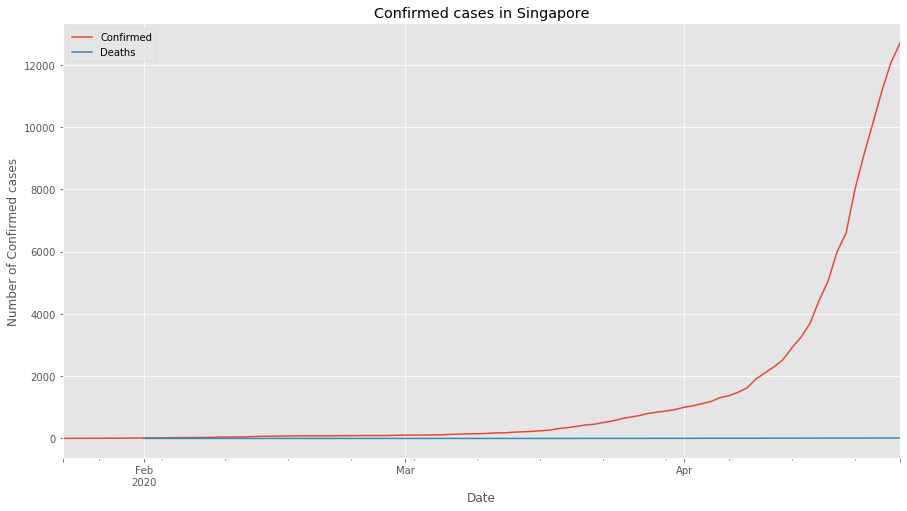

In [72]:
ax = records[records.Country_1=="Singapore"].plot(kind="line",x="Date",y=["Confirmed","Deaths"],figsize=(15,8))
ax.set_title("Confirmed cases in Singapore")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed cases")

In [85]:
records[(records.Country=="France")&(records.Date=="2020-04-13")].groupby("Combined_Key").agg({"Confirmed":"sum"})

,Confirmed
Combined_Key,
France,136779.0
"French Guiana, France",86.0
"French Polynesia, France",55.0
"Guadeloupe, France",143.0
"Martinique, France",157.0
"Mayotte, France",207.0
"New Caledonia, France",18.0
"Reunion, France",391.0
"Saint Barthelemy, France",6.0


In [86]:
records[(records.Country=="France")&(records.Date=="2020-04-14")].groupby("Combined_Key").agg({"Confirmed":"sum"})

,Confirmed
Combined_Key,
France,130253.0
"French Guiana, France",86.0
"French Polynesia, France",55.0
"Guadeloupe, France",145.0
"Martinique, France",157.0
"Mayotte, France",217.0
"New Caledonia, France",18.0
"Reunion, France",391.0
"Saint Barthelemy, France",6.0


In [87]:
records[(records.Country=="France")&(records.Date=="2020-04-15")].groupby("Combined_Key").agg({"Confirmed":"sum"})

,Confirmed
Combined_Key,
France,133470.0
"French Guiana, France",86.0
"French Polynesia, France",55.0
"Guadeloupe, France",145.0
"Martinique, France",158.0
"Mayotte, France",217.0
"New Caledonia, France",18.0
"Reunion, France",391.0
"Saint Barthelemy, France",6.0


In [75]:
records.head()

,Confirmed,Deaths,Recovered,Date,Admin2,Active,Combined_Key,Prov,Country,Lati,Longi,Country_1
0,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,Anhui,Mainland China,NaN,NaN,China
1,14.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,Beijing,Mainland China,NaN,NaN,China
2,6.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,Chongqing,Mainland China,NaN,NaN,China
3,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,Fujian,Mainland China,NaN,NaN,China
5,26.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,Guangdong,Mainland China,NaN,NaN,China


## Mobility trends

In [20]:
url_racine_mob = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2006HotfixDev8/v1/en-us/applemobilitytrends-"
date_today = datetime.date.today()
iterative = 0
data_downloaded=0
while (iterative<20)&(data_downloaded==0):
    data_downloaded=1
    date=date_today- datetime.timedelta(days=iterative)
    date_str = date.strftime("%Y-%m-%d")
    try:
        data_mobility = pd.read_csv(url_racine_mob+date_str+".csv")
    except:
        data_downloaded=0
        pass
    iterative+=1

print("the mobility trend dataset is from the date: {}".format(date.strftime("%Y-%m-%d")))

the mobility trend dataset is from the date: 2020-04-17


We need to collect the coordinates of the countries in the Apple's data. they will be retrieved from **geopy**

In [21]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode,min_delay_seconds=1)
locations = data_mobility.region.apply(geocode)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Hsin-chu',), **{}).
Traceback (most recent call last):
  File "c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\geopy\geocoders\base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "c:\users\whax\appdata\local\programs\python\python38\lib\urllib\request.py", line 525, in open
    response = self._open(req, data)
  File "c:\users\whax\appdata\local\programs\python\python38\lib\urllib\request.py", line 542, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
  File "c:\users\whax\appdata\local\programs\python\python38\lib\urllib\request.py", line 502, in _call_chain
    result = func(*args)
  File "c:\users\whax\appdata\local\programs\python\python38\lib\urllib\request.py", line 1362, in https_open
    return self.do_open(http.client.HTTPSConnection, req,
  File "c:\users\whax\appdata\local\programs\python\python38\lib\urllib\requ

In [22]:
df_data_1=pd.DataFrame(columns=["adress","coord"])
tuple_loc = locations.apply(lambda loc: tuple(loc))
df_data_1[["adress","coord"]]=pd.DataFrame(tuple_loc.tolist())
df_data_1[['latitudes','longitudes']]=pd.DataFrame(df_data_1.coord.tolist())
df_data_1.head()
df_data_1[df_data_1.adress=="France"]

,adress,coord,latitudes,longitudes
42,France,"(46.603354, 1.8883335)",46.603354,1.888334
43,France,"(46.603354, 1.8883335)",46.603354,1.888334
44,France,"(46.603354, 1.8883335)",46.603354,1.888334


In [23]:
#!pip install folium
import folium
latitude=46.603354
longitude=1.888334
# create map of toronto using latitude and longitude values
map_world = folium.Map(location=[latitude, longitude], zoom_start=2.5)

# add markers to map
for values in df_data_1.index.values:
    adress, coord, lat,lng = df_data_1.loc[values]
    label = '{}'.format(adress)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_world)  

In [118]:
map_world

In [27]:
data_mobility.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51


In [28]:
data_mobility_transpose = data_mobility.set_index(["geo_type","region","transportation_type"]).T
data_mobility_transpose.head()

geo_type            country/region                                      \
region                     Albania         Argentina         Australia   
transportation_type        driving walking   driving walking   driving   
2020-01-13                  100.00  100.00    100.00  100.00    100.00   
2020-01-14                   95.30  100.68     97.07   95.11    102.98   
2020-01-15                  101.43   98.93    102.45  101.37    104.21   
2020-01-16                   97.20   98.46    111.21  112.67    108.63   
2020-01-17                  103.55  100.85    118.45  116.72    109.08   

geo_type                                                     ...      city  \
region                              Austria         Belgium  ... Vancouver   
transportation_type transit walking driving walking driving  ...   transit   
2020-01-13           100.00  100.00  100.00  100.00  100.00  ...    100.00   
2020-01-14           101.78  101.31  101.14  101.55  101.19  ...     93.81   
2020-01-15           100.64  101.82  104.24  105.59  107.49  ...     86.78   
2020-01-16            99.58  104.52  112.21  112.24  107.67  ...     96.86   
2020-01-17            98.34  113.73  117.23  123.36  117.38  ...    104.61   

geo_type                                                                   \
region                       Vienna         Washington DC                   
transportation_type walking driving walking       driving transit walking   
2020-01-13           100.00  100.00  100.00        100.00  100.00  100.00   
2020-01-14           105.24  103.12  103.45        105.82  100.78   99.07   
2020-01-15            91.04  106.60  106.04        109.02  103.92  109.61   
2020-01-16           111.66  126.18  116.05        110.37  105.02  104.16   
2020-01-17           139.11  113.78  128.79        123.98  112.26  123.16   

geo_type                                     
region               Zurich                  
transportation_type driving transit walking  
2020-01-13           100.00  100.00  100.00  
2020-01-14           102.38  101.51  106.27  
2020-01-15           110.84  108.93  116.73  
2020-01-16           105.48   97.87  115.31  
2020-01-17           113.83  103.91  118.22  

[5 rows x 395 columns]

# Feature engineering

In [119]:
sumup_countries = records.groupby(["Country_1","Date"]).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

## Case Fatality Rate (CFR)

One indicator of the fatalities is the Case fatality rate (https://en.wikipedia.org/wiki/Case_fatality_rate)

In [120]:
sumup_countries = sumup_countries.assign(CFR = lambda df : df.Deaths/df.Confirmed).reset_index()

In [121]:
sumup_countries[sumup_countries.Country_1=="US"].sort_values("Date",ascending=False).head()

,Country_1,Date,Confirmed,Deaths,Recovered,CFR
9465,US,2020-04-25,938154.0,53755.0,100372.0,0.057299
9464,US,2020-04-24,905333.0,51949.0,99079.0,0.057381
9463,US,2020-04-23,869170.0,49954.0,80203.0,0.057473
9462,US,2020-04-22,840220.0,46622.0,77366.0,0.055488
9461,US,2020-04-21,811865.0,44444.0,75204.0,0.054743


count    185.000000
mean       0.038924
std        0.042067
min        0.000000
25%        0.008658
50%        0.027484
75%        0.055250
max        0.250000
Name: CFR, dtype: float64


[]

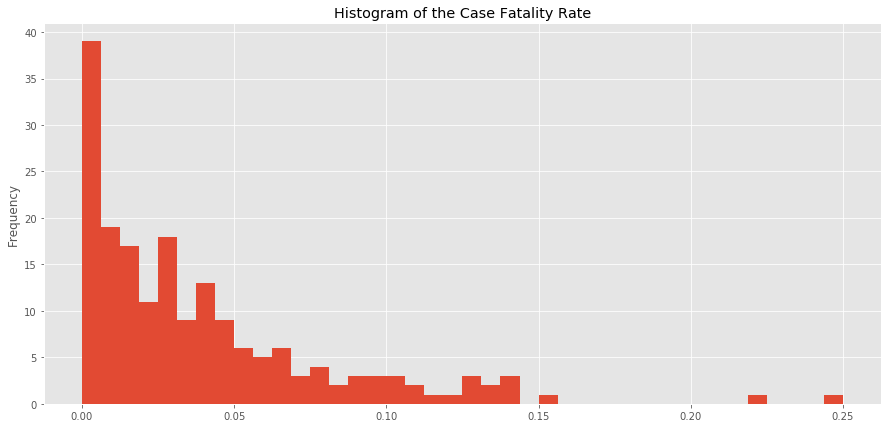

In [122]:
print(sumup_countries[sumup_countries.Date==sumup_countries.Date.max()].CFR.describe())
ax = sumup_countries[sumup_countries.Date==sumup_countries.Date.max()].CFR.plot.hist(figsize=(15,7),bins=40)
ax.set_title("Histogram of the Case Fatality Rate")
ax.plot()

## Number of days since 100th case

In [123]:
sumup_countries["interm"]=abs(sumup_countries.Confirmed-100)
control = sumup_countries.groupby(["Country_1"]).agg({"interm":"min"})

In [124]:
sumup_countries["check"]=False
for values in control.index.values:
    sumup_countries.loc[(sumup_countries.Country_1==values)&(sumup_countries.interm==control.loc[values].interm),"check"]=True

df=sumup_countries.loc[sumup_countries.check==True,["Date","Country_1"]]
sumup_countries = sumup_countries.merge(df,how="left",on="Country_1").assign(since_100th = lambda df : df["Date_x"] - df["Date_y"]).drop(columns=["interm","check","Date_y"])

In [125]:
sumup_countries["since_100th"]=sumup_countries.since_100th.dt.days
sumup_countries.head()

,Country_1,Date_x,Confirmed,Deaths,Recovered,CFR,since_100th
0,Azerbaijan,2020-02-28,1.0,0.0,0.0,0.0,0
1,Afghanistan,2020-02-24,1.0,0.0,0.0,0.0,-31
2,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,-30
3,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,-29
4,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,-28


## Relative increase

As we saw in the plot on the confirmed case in Singapore, the number seems to have an exponential growth:
$$ N_t = N_0\times e^{rate . t} \\
dN_t = rate\times N_0 \times e^{rate\times t} \times dt = rate\times N_t\times dt
$$

So, if the regime is consistent, the quantity $\frac{\Delta N_t}{N_t}=\frac{N_{t+1}-N_t}{N_t}$ will be constant.
In order to analyse change of regime, we will compute the following variable:

$$ rate_t = \frac{\Delta N_t}{N_t}=\frac{N_{t}-N_{t-1}}{N_t} $$

In [126]:
diff_confirmed = sumup_countries.groupby("Country_1").agg({"Confirmed":"diff"})

sumup_countries['diff_conf']=diff_confirmed.Confirmed
sumup_countries = sumup_countries.assign(rate_confirmed = lambda df : df["diff_conf"]/df.Confirmed)

diff_deaths = sumup_countries.groupby("Country_1").agg({"Deaths":"diff"})

sumup_countries['diff_death']=diff_deaths.Deaths
sumup_countries = sumup_countries.assign(rate_deaths = lambda df : df["diff_death"]/df.Deaths)


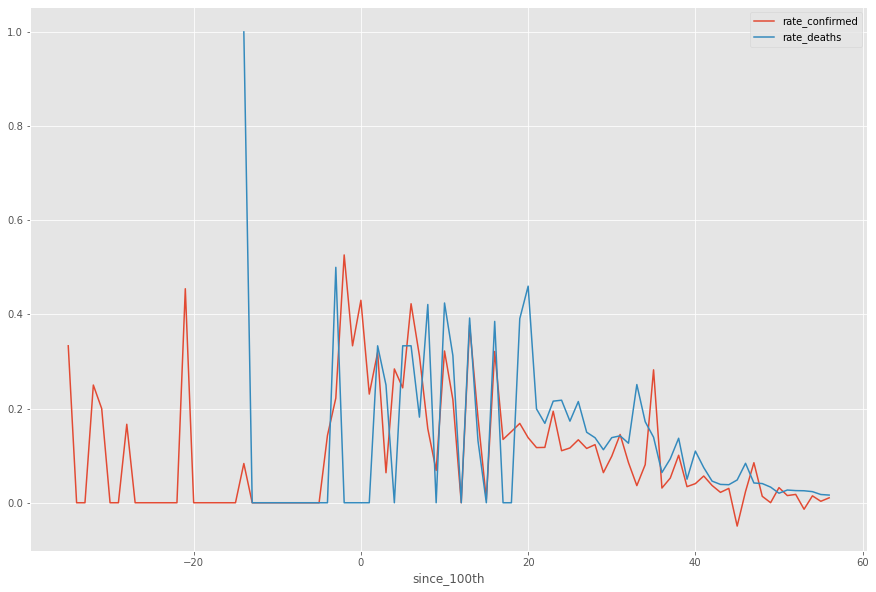

In [129]:
sumup_countries[sumup_countries.Country_1=="France"].plot(kind="line",x="since_100th",y=["rate_confirmed","rate_deaths"],figsize=(15,10))

## First Viz

Text(0.5, 1.0, 'mobility trend in France')

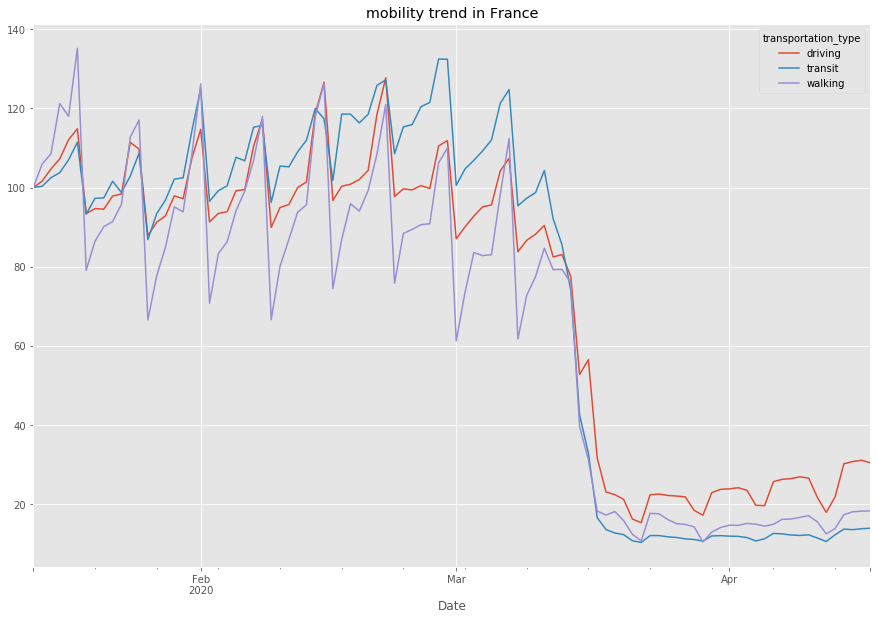

In [229]:
mob_France = data_mobility[data_mobility.region=="France"].drop(columns=["geo_type","region"]).set_index("transportation_type").T.reset_index().rename(columns={"index":"Date"})
mob_France["Date"] = [datetime.datetime.strptime(date_str,'%Y-%m-%d') for date_str in mob_France.Date]
ax = mob_France.plot(kind="line",x="Date",y=["driving","transit","walking"],figsize=(15,10))
ax.set_title("mobility trend in France")

Text(0, 0.5, 'Number of cases')

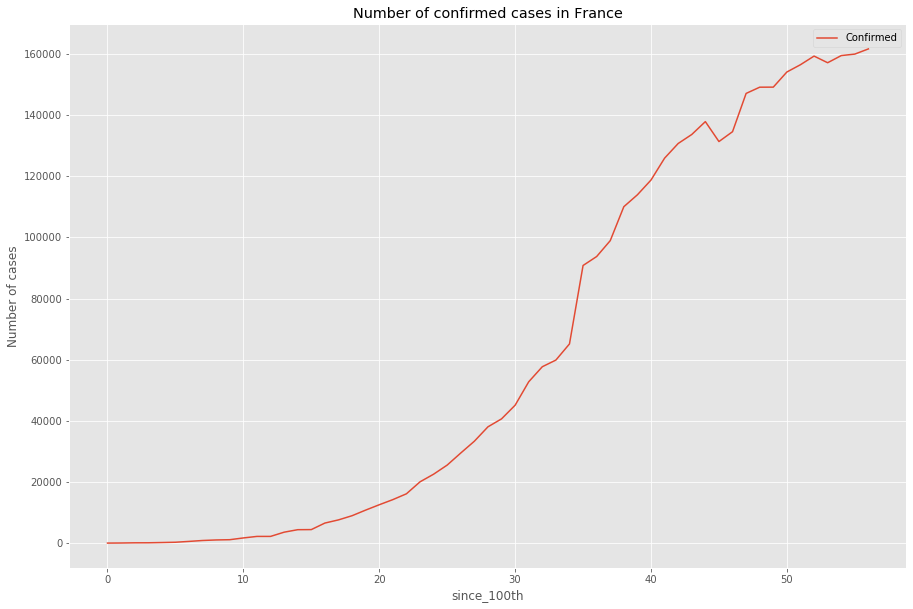

In [131]:
ax = sumup_countries[(sumup_countries.Country_1=="France")&(sumup_countries.since_100th.astype("int")>-1)].plot(kind="line",x="since_100th",y="Confirmed",figsize=(15,10))
ax.set_title("Number of confirmed cases in France")
ax.set_ylabel("Number of cases")

In [132]:
mob_France.head()

transportation_type,Date,driving,transit,walking
0,2020-01-13,100.00,100.00,100.00
1,2020-01-14,101.60,100.31,105.95
2,2020-01-15,104.67,102.48,108.49
3,2020-01-16,107.25,103.75,121.22
4,2020-01-17,112.07,106.97,117.98


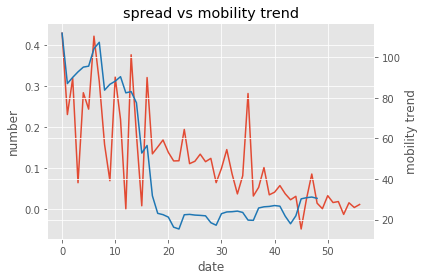

In [137]:
graph_France = sumup_countries[(sumup_countries.Country_1=="France")&(sumup_countries.since_100th.astype("int")>-1)].merge(mob_France,right_on="Date",left_on="Date_x",how="left")

fig, ax = plt.subplots()
ax.set_title('spread vs mobility trend')
color = 'tab:red'
ax.set_xlabel('date')
ax.set_ylabel('number')
ax.plot(graph_France["since_100th"],graph_France["rate_confirmed"])

ax1=ax.twinx()

ax1.plot(graph_France["since_100th"],graph_France["driving"],color='tab:blue')
ax1.set_ylabel('mobility trend')
fig.tight_layout()

plt.show()


# Which countries decrease their mobility ?

In [178]:
mob_country = data_mobility[(data_mobility.geo_type=="country/region")&(data_mobility.transportation_type=="driving")].drop(columns=["geo_type","transportation_type"]).set_index(["region"]).T.reset_index()
mob_country.rename(columns={"index":"Date"},inplace=True)
mob_country.drop(columns='Date').corr().loc["Finland","France"]

0.9325691652104716

In [209]:
mob_country.iloc[45:].corr().loc[["Finland","France"]]

region,Albania,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Cambodia,Canada,Chile,...,Switzerland,Taiwan,Thailand,Turkey,UK,United States,Ukraine,United Arab Emirates,Uruguay,Vietnam
region,,,,,,,,,,,,,,,,,,,,,
Finland,0.922105,0.898245,0.776029,0.956686,0.934989,0.865800,0.944954,0.936160,0.917741,0.893606,...,0.937344,0.640438,0.857020,0.845310,0.863394,0.915448,0.825496,0.878785,0.9288,0.855173
France,0.886035,0.980492,0.882769,0.969356,0.978279,0.952024,0.970642,0.964211,0.977802,0.977225,...,0.960101,0.529041,0.896061,0.935131,0.951340,0.970855,0.940777,0.958088,0.9831,0.881290


In [211]:
mob_country.drop(columns='Date').T

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
region,,,,,,,,,,,,,,,,,,,,,
Albania,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,...,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26
Argentina,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,...,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17
Australia,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,...,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51
Austria,100.0,101.14,104.24,112.21,117.23,117.22,105.17,100.70,102.67,104.33,...,47.85,48.81,45.09,36.78,35.06,42.33,51.14,53.88,56.02,54.07
Belgium,100.0,101.19,107.49,107.67,117.38,119.32,102.68,103.67,107.83,110.00,...,48.56,49.18,51.57,47.49,37.88,37.20,46.52,49.42,51.74,50.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,100.0,102.97,105.19,108.48,125.51,115.04,90.91,102.57,103.07,103.01,...,56.21,56.90,63.87,57.51,37.42,54.98,59.30,63.03,64.11,70.71
Ukraine,100.0,104.63,110.48,106.39,111.80,95.55,94.31,102.26,107.91,108.29,...,61.80,64.30,64.78,54.75,57.59,64.68,65.56,66.23,68.98,70.43
United Arab Emirates,100.0,102.23,99.74,110.59,116.91,106.60,97.66,98.69,97.72,101.27,...,39.17,37.21,39.73,42.36,44.16,42.93,42.46,40.74,41.26,39.71


<ipython-input-249-3f01614e4717>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


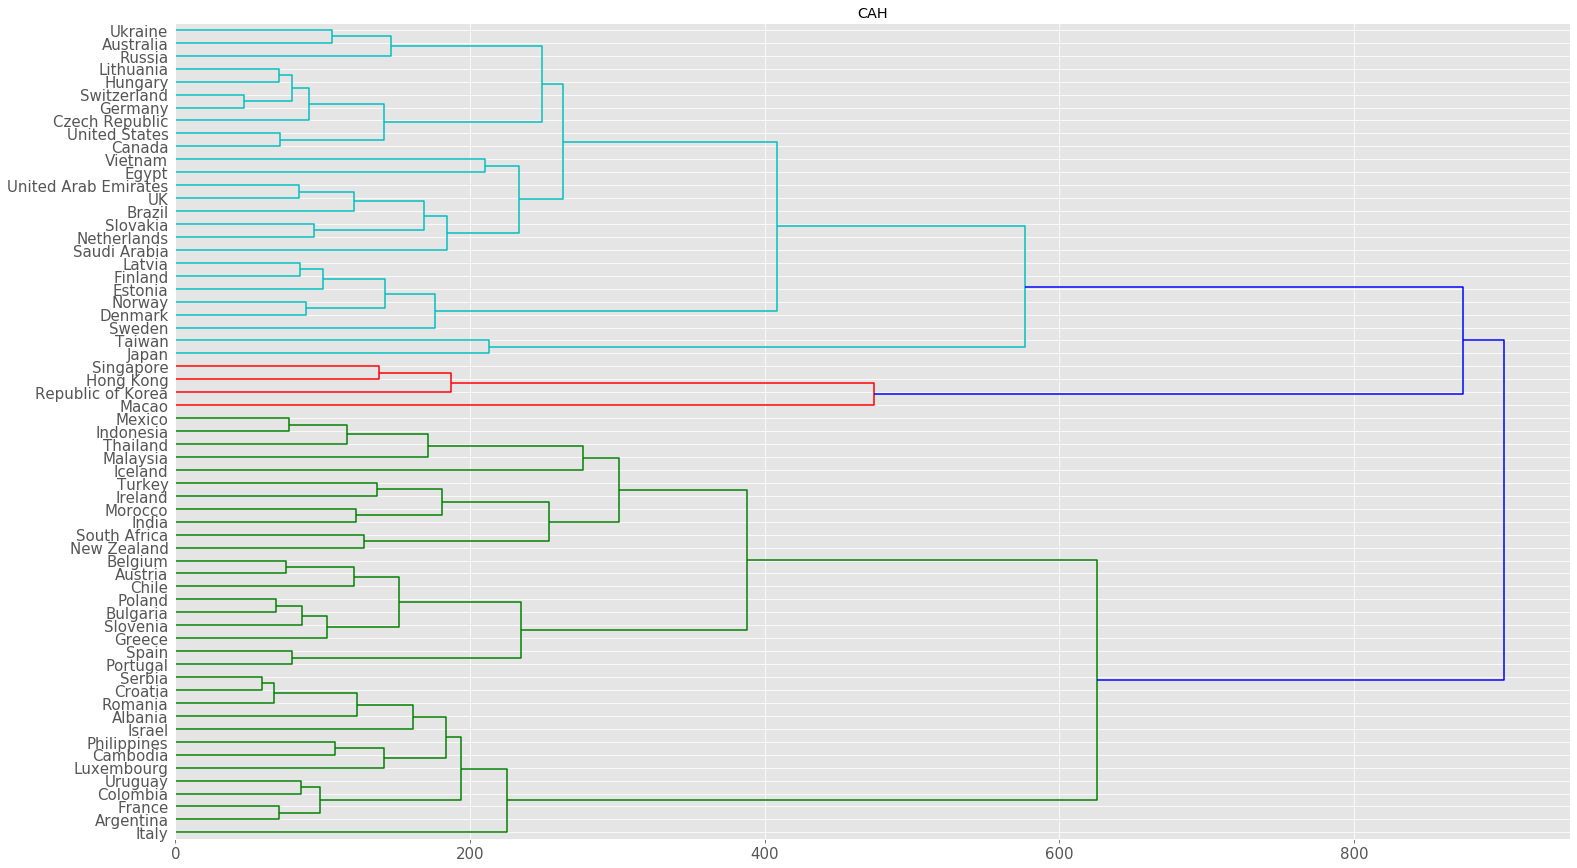

In [249]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#générer la matrice des liens
fig = plt.figure(figsize=(25,15))
plt.xticks(fontsize=14)
data =mob_country.drop(columns='Date').T
Z = linkage(mob_country.drop(columns='Date').T,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")

#dendrogram(Z,labels=data.index,orientation='right',color_threshold=6)
#plt.show()



ax = fig.add_subplot(1, 1, 1)
dendrogram(Z,labels=data.index,orientation='right', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

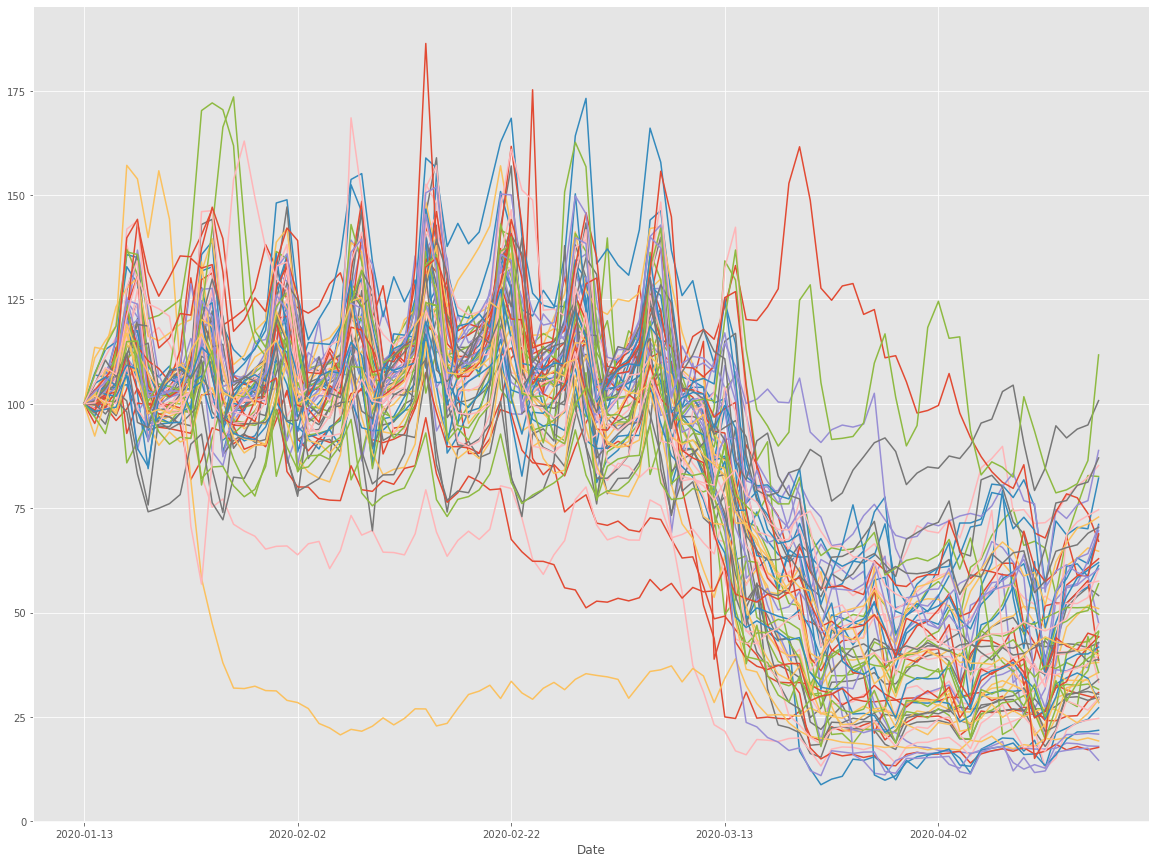

In [188]:
mob_country.columns.values[1:]
ax = mob_country.plot(kind="line",y=mob_country.columns.values[1:].tolist(),x="Date",figsize=(20,15))
ax.get_legend().remove()

In [239]:
groupes_cah = fcluster(Z,t=600,criterion='distance')
print(groupes_cah)
#index triés des groupes

idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
result_cah=pd.DataFrame(data.index[idg],groupes_cah[idg]).reset_index()

[1 1 4 2 2 4 2 1 4 2 1 1 4 4 4 4 4 1 4 2 3 4 2 2 2 2 1 1 4 4 4 1 3 2 2 2 4
 2 4 1 2 2 3 1 4 4 1 3 4 2 2 2 4 4 4 2 2 4 4 4 4 1 4]


In [263]:
mob_country_date = mob_country.T
mob_country_date.columns = mob_country_date.loc["Date"]
mob_country_date = mob_country_date.drop("Date",axis=0)
mob_country_date.head()

Date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
region,,,,,,,,,,,,,,,,,,,,,
Albania,100,95.3,101.43,97.2,103.55,112.67,104.83,94.39,94.07,93.51,...,26.43,26.7,26.32,25.47,24.89,32.64,31.43,30.67,30,29.26
Argentina,100,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,...,19.95,19.8,16.8,19.4,12.89,21.1,22.29,23.55,24.4,27.17
Australia,100,102.98,104.21,108.63,109.08,89,99.35,103.53,106.8,107.4,...,59.24,33.19,36,26.95,31.72,53.14,55.91,56.56,58.77,47.51
Austria,100,101.14,104.24,112.21,117.23,117.22,105.17,100.7,102.67,104.33,...,47.85,48.81,45.09,36.78,35.06,42.33,51.14,53.88,56.02,54.07
Belgium,100,101.19,107.49,107.67,117.38,119.32,102.68,103.67,107.83,110,...,48.56,49.18,51.57,47.49,37.88,37.2,46.52,49.42,51.74,50.94


In [285]:
result_cah.rename({"index":"class"},inplace=True)
dyn_group = result_cah.merge(mob_country_date,left_on="region",right_index=True,how="left")
classif = dyn_group.loc[:,["region","index"]]
dyn_group.drop(columns="region",inplace=True)
classif

,region,index
0,Albania,1
1,Serbia,1
2,Romania,1
3,Philippines,1
4,Uruguay,1
...,...,...
58,Egypt,4
59,Denmark,4
60,Czech Republic,4
61,Saudi Arabia,4


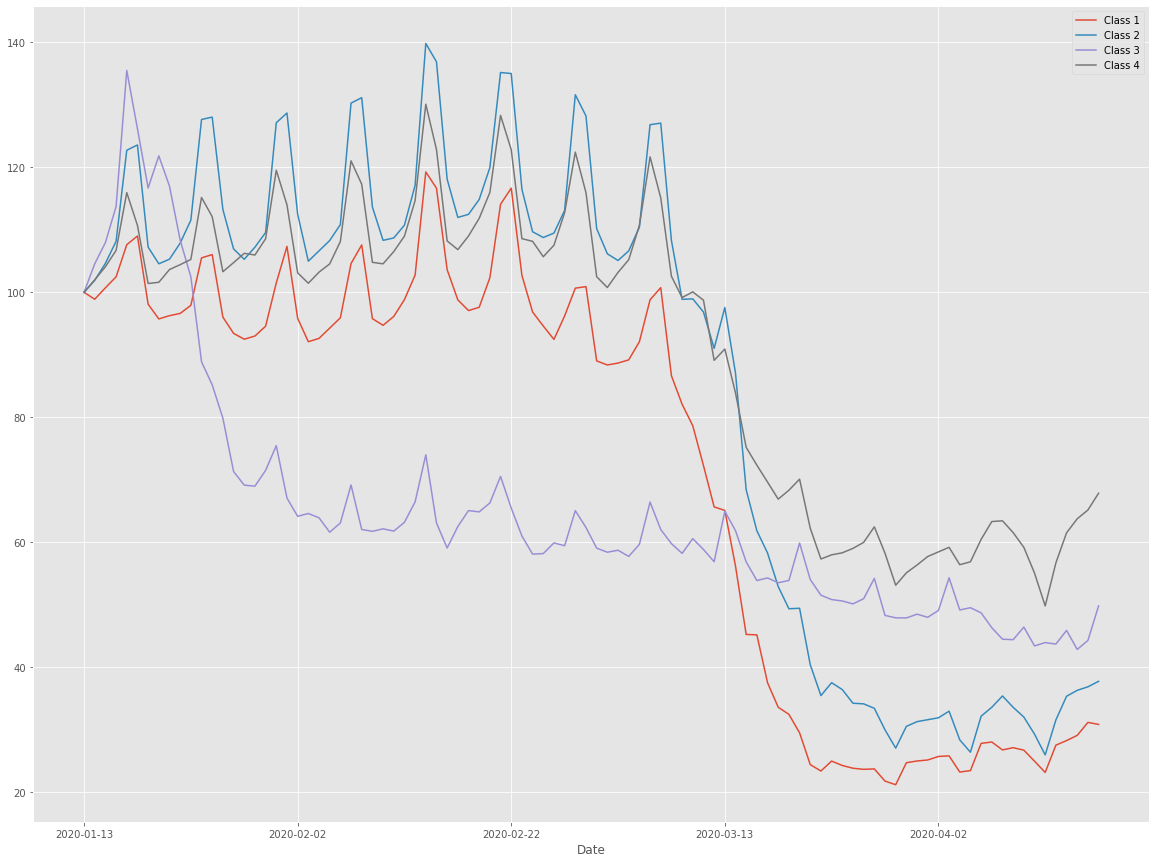

In [284]:
graph = dyn_group.astype('float').groupby('index').mean().T.reset_index()
graph.columns = ["Date","Class 1","Class 2", "Class 3","Class 4"]
graph.plot(kind='line',x="Date",y=["Class 1","Class 2", "Class 3","Class 4"],figsize=(20,15))

In [146]:
mob_France["Date"] = [datetime.datetime.strptime(date_str,'%Y-%m-%d') for date_str in mob_France.Date]


In [147]:
mob_France.plot(kind="line",x="Date",y="driving")

KeyError: 'driving'